In [2]:
captions ="Several men in hard hats are operating a giant pulley system"

In [60]:
from PIL import Image
from pathlib import Path

orig_img = Image.open(Path("flickr30k_images") / "10002456.jpg")

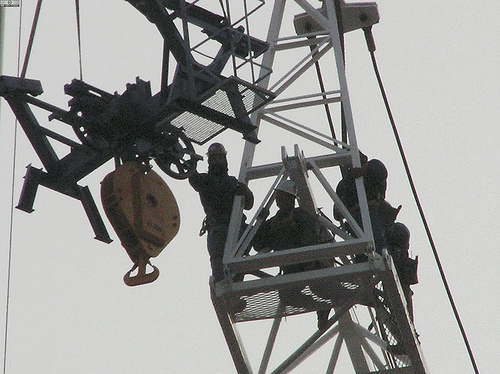

In [61]:
orig_img

In [67]:
from torchvision.transforms import v2

pil_to_tensor = v2.PILToTensor()

a = pil_to_tensor(orig_img)
a.shape

torch.Size([3, 374, 500])

In [6]:
resize_img_transform = v2.Resize((224,224))

new_resize_img = resize_img_transform(a)

new_resize_img.shape

/Users/Deependu/Library/Python/3.9/lib/python/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


torch.Size([3, 224, 224])

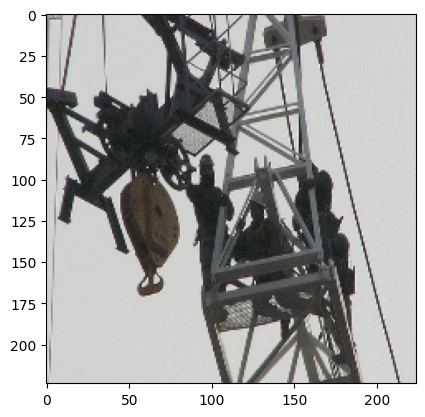

In [7]:
import matplotlib.pyplot as plt
plt.imshow(new_resize_img.permute(1,2,0))
plt.show()

In [4]:
a = [11,22,33,44,55]

for i,z in enumerate(a,5):
    print(i,z)

5 11
6 22
7 33
8 44
9 55


In [8]:
import torch
import torch.nn as nn

a = torch.randn(size=(3,4))
a

tensor([[-0.2387,  1.2195, -0.0273, -0.0780],
        [ 1.2580, -0.0691, -1.4714,  0.8992],
        [ 0.0190,  0.3735, -0.3386, -0.2260]])

In [16]:
b = a.max(dim=1, keepdim=True)[1]
b

tensor([[1],
        [0],
        [1]])

In [21]:
c = torch.tensor([1,0,2])

# pred.eq(target.view_as(pred)).sum().item()
b.eq(c.view_as(b)).sum().item()

2

In [106]:
import torch
from torch.utils.data import Dataset
from torchvision.transforms import v2
import matplotlib.pyplot as plt

import os
import pandas as pd
from torchvision.io import read_image

from PIL import Image
from pathlib import Path


class CustomImageDataset(Dataset):
    def __init__(
        self, annotations_dataframe, img_dir, transform=None, target_transform=None
    ):
        self.annotations_df = annotations_dataframe # annotation dataframe
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.annotations_df)

    def __getitem__(self, idx):
        image_caption = self.annotations_df.iloc[idx, 2]

        img_path = os.path.join(self.img_dir, self.annotations_df.iloc[idx, 0])
        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            image_caption = self.target_transform(image_caption)
        return image, image_caption

In [124]:
train_transform = v2.Compose(
    [
        v2.PILToTensor(),
        v2.Resize(size=(224, 224), antialias=True),
        v2.RandomHorizontalFlip(p=0.5),
        v2.ToDtype(torch.float32, scale=True),
    ]
)

test_transform = v2.Compose(
    [
        v2.PILToTensor(),
        v2.Resize(size=(224, 224), antialias=True),
        v2.ToDtype(torch.float32, scale=True),
    ]
)

In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("results.csv", delimiter="|")
train_df, test_df = train_test_split(df, test_size=0.02, random_state=42)

image_dir = "flickr30k_images"
train_dataset = CustomImageDataset(
    annotations_dataframe=train_df, img_dir=image_dir, transform=train_transform
)
test_dataset = CustomImageDataset(
    annotations_dataframe=test_df, img_dir=image_dir, transform=test_transform
)

In [126]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=1, shuffle=True)

In [127]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))

In [128]:
train_labels

(' Three men on a large rig .',)

In [129]:
train_features.shape

torch.Size([1, 3, 224, 224])

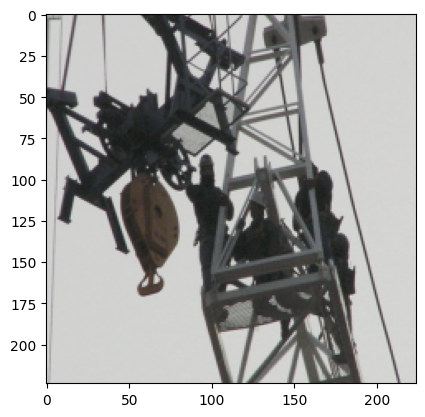

In [131]:
import matplotlib.pyplot as plt

plt.imshow(train_features[0].permute(1, 2, 0))

In [132]:
# Display image and label.
test_features, test_labels = next(iter(test_dataloader))

In [133]:
test_labels

(' Workers look down from up above on a piece of equipment .',)

In [136]:
train_features.shape

torch.Size([1, 3, 224, 224])

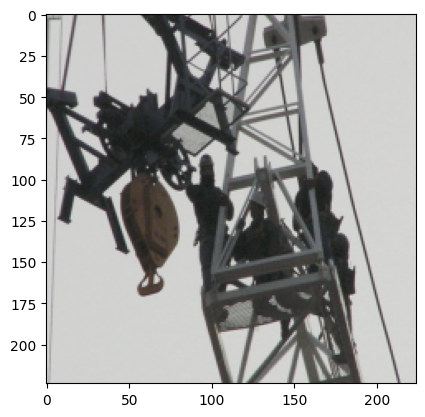

In [137]:
plt.imshow(test_features[0].permute(1, 2, 0))
plt.show()